**Installing the required packages:**

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install wordcloud

In [ ]:
pip install pillow

In [ ]:
import pandas as pd
import numpy as np

**Importing and Exploring the data:**

In [ ]:
papers=pd.read_csv("/content/HCI_Meta.csv")

In [ ]:
papers.head(10)

,Rank,Publication ID,DOI,PMID,PMCID,Title,Abstract,Acknowledgements,Source title,Anthology title,MeSH terms,PubYear,Publication Date (online),Publication Date (print),Volume,Issue,Pagination,Open Access,Publication Type,Authors,Authors (Raw Affiliation),Corresponding Author,Authors Affiliations,Times cited,Recent citations,RCR,FCR,Source Linkout,Dimensions URL,FOR (ANZSRC) Categories,Sustainable Development Goals
0,58,pub.1135205624,10.1109/icidm51048.2020.9339636,NaN,NaN,What is ICIDM?,Provides general information of interest to co...,NaN,NaN,2020 6th International Conference on Interacti...,NaN,2021,28/01/21,NaN,NaN,NaN,i-iv,All OA; Bronze,Proceeding,NaN,NaN,NaN,NaN,0,0,NaN,NaN,https://ieeexplore.ieee.org/ielx7/9339608/9339...,https://app.dimensions.ai/details/publication/...,NaN,NaN
1,46,pub.1137856247,10.1145/3411764.3445332,34104927.0,PMC8182671,Prototyping for Social Wellbeing with Early So...,Many 10-14 year olds are at the early stages o...,NaN,NaN,Proceedings of the 2021 CHI Conference on Huma...,NaN,2021,07/05/21,06/05/21,2021.0,NaN,Jan-15,All OA; Green,Proceeding,"Charmaraman, Linda; Delcourt, Catherine Grevet","Charmaraman, Linda (Youth, Media & Wellbeing R...",NaN,"Charmaraman, Linda (Wellesley Centers for Wome...",0,0,NaN,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,https://app.dimensions.ai/details/publication/...,1608 Sociology; 16 Studies in Human Society,NaN
2,44,pub.1138583356,10.1109/wccct52091.2021.00019,NaN,NaN,A Multi-interface Data Acquisition Gateway Bas...,The IPv6 over Low Power Wireless Personal Area...,This work is supported by CERNET Innovation Pr...,NaN,2021 World Conference on Computing and Communi...,NaN,2021,NaN,25/01/21,0.0,NaN,64-68,Closed,Proceeding,"Li, Lun; Wang, Guangwen; Zhao, Liang","Li, Lun (School of Control Science and Enginee...","Zhao, Liang (Dalian University of Technology)","Li, Lun (Dalian University of Technology); Wan...",0,0,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...,08 Information and Computing Sciences; 0806 In...,NaN
3,43,pub.1137035182,10.1109/iaeac50856.2021.9390655,NaN,NaN,A Domestical Safety Computer Platform for Rail...,Safety computer platform plays important role ...,This work was supported by Science and Technol...,NaN,"2021 IEEE 5th Advanced Information Technology,...",NaN,2021,NaN,14/03/21,5.0,NaN,26-30,Closed,Proceeding,"Yu, Jianjie","Yu, Jianjie (Signal and Communication Research...","Yu, Jianjie (China Academy of Railway Sciences)","Yu, Jianjie (China Academy of Railway Sciences)",0,0,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...,08 Information and Computing Sciences; 0803 Co...,NaN
4,43,pub.1138706349,10.23919/measurement52780.2021.9446779,NaN,NaN,Steady-State Visual Evoked Potentials SSVEP in...,The subject of the article concerns the interd...,NaN,NaN,2021 13th International Conference on Measurement,NaN,2021,NaN,19/05/21,0.0,NaN,123-126,Closed,Proceeding,"Hulewicz, Arkadiusz; Dziarski, Krzysztof","Hulewicz, Arkadiusz (Institute of Electrical E...","Hulewicz, Arkadiusz (Poznań University of Tech...","Hulewicz, Arkadiusz (Poznań University of Tech...",0,0,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...,1109 Neurosciences; 11 Medical and Health Scie...,NaN
5,43,pub.1138371113,10.1109/iciccs51141.2021.9432104,NaN,NaN,Smart psychological estimation and modeling ba...,Smart psychological estimation and modeling ba...,The paper is supported by the Natural Science ...,NaN,2021 5th International Conference on Intellige...,NaN,2021,NaN,08/05/21,0.0,NaN,1623-1626,Closed,Proceeding,"Guo, Zhiqiang; Xu, Lina","Guo, Zhiqiang (School of Computer, Zhuhai Coll...",NaN,"Guo, Zhiqiang (); Xu, Lina (Jilin University)",0,0,NaN,NaN,NaN,https://app.dimensions.ai/details/publication/...,08 Information and Computing Sciences; 11 Medi...,NaN
6,43,pub.1138696551,10.1109/aero50100.2021.9438400,NaN,NaN,Human-Humanoid Robot Interaction through Virtu...,"In the last decade, there have been great adva...",This research is supporte

**Counting the No of words in each Abstract**

In [ ]:
papers['word_count']=papers['Abstract'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
papers[['Abstract','word_count']].head(5)

,Abstract,word_count
0,Provides general information of interest to co...,8
1,Many 10-14 year olds are at the early stages o...,148
2,The IPv6 over Low Power Wireless Personal Area...,223
3,Safety computer platform plays important role ...,122
4,The subject of the article concerns the interd...,112


**Describing word_count column:**

In [ ]:
papers['word_count'].describe()

count    500.000000
mean     149.102000
std       54.418879
min        1.000000
25%      118.000000
50%      146.000000
75%      176.000000
max      396.000000
Name: word_count, dtype: float64

**Identifying the Most&Least frequent words:**

In [ ]:
freq = pd.Series(''.join(str(papers['Abstract'])).split()).value_counts()[:20]
freq

the         6
The         3
of          3
...         3
over        2
a           2
year        1
Personal    1
a...        1
computer    1
to          1
object      1
co...       1
combing     1
IPv6        1
Many        1
2           1
Safety      1
dtype:      1
as          1
dtype: int64

In [ ]:
freq1 = pd.Series(''.join(str(papers['Abstract'])).split()).value_counts()[-20:]
freq1

system,              1
subject              1
early                1
Name:                1
paper                1
0                    1
Energy               1
499                  1
497                  1
496                  1
Human-Computer...    1
Low                  1
general              1
plays                1
are                  1
495                  1
In                   1
all                  1
platform             1
explores             1
dtype: int64

**Building Text Corpus:**

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
stop_words= set(stopwords.words("english"))
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [ ]:
corpus = []
for i in range(0, 500):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(papers['Abstract'][i]))
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
corpus[33]

'information communication technology impact learning student per latest research found educator digitally literate trained use digital device teaching lead higher order thinking skill provide creative personalized option student express understanding leave student better prepared manage ongoing technical change world workplace revolution education india need cost effective innovative educational device technology play important role stem education designed low cost educational laptop school student educator educational laptop good connectivity processing power ease use feature physical computing boost creativity programming skill young scholar'

**Generating Word Cloud to explore frequent keywords:**

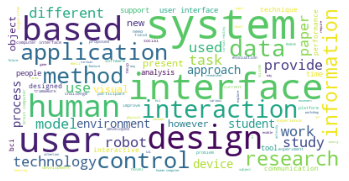

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    max_font_size=50,
    random_state=42
).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

**Generating the Uni-gram, Bi-gram and Tri-gram models:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['provides',
 'general',
 'information',
 'interest',
 'conference',
 'attendee',
 'many',
 'year',
 'old',
 'early']

[Text(0, 0, 'interface'),
 Text(0, 0, 'system'),
 Text(0, 0, 'user'),
 Text(0, 0, 'human'),
 Text(0, 0, 'design'),
 Text(0, 0, 'interaction'),
 Text(0, 0, 'computer'),
 Text(0, 0, 'based'),
 Text(0, 0, 'data'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'control'),
 Text(0, 0, 'robot'),
 Text(0, 0, 'application'),
 Text(0, 0, 'method'),
 Text(0, 0, 'study'),
 Text(0, 0, 'research'),
 Text(0, 0, 'used'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'information'),
 Text(0, 0, 'use')]

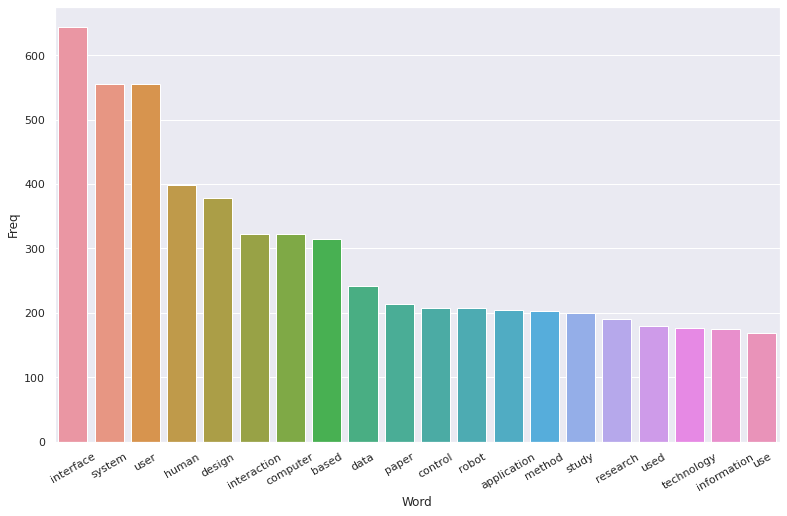

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0            user interface   105
1        computer interface    79
2            brain computer    75
3            human computer    60
4           virtual reality    58
5          machine learning    50
6      computer interaction    49
7             interface bci    38
8                 real time    37
9             paper present    37
10              human robot    35
11        augmented reality    34
12  artificial intelligence    33
13               eeg signal    32
14               user study    31
15          user experience    27
16            human machine    26
17            motor imagery    25
18               bci system    25
19         interface design    24


[Text(0, 0, 'user interface'),
 Text(0, 0, 'computer interface'),
 Text(0, 0, 'brain computer'),
 Text(0, 0, 'human computer'),
 Text(0, 0, 'virtual reality'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'computer interaction'),
 Text(0, 0, 'interface bci'),
 Text(0, 0, 'real time'),
 Text(0, 0, 'paper present'),
 Text(0, 0, 'human robot'),
 Text(0, 0, 'augmented reality'),
 Text(0, 0, 'artificial intelligence'),
 Text(0, 0, 'eeg signal'),
 Text(0, 0, 'user study'),
 Text(0, 0, 'user experience'),
 Text(0, 0, 'human machine'),
 Text(0, 0, 'motor imagery'),
 Text(0, 0, 'bci system'),
 Text(0, 0, 'interface design')]

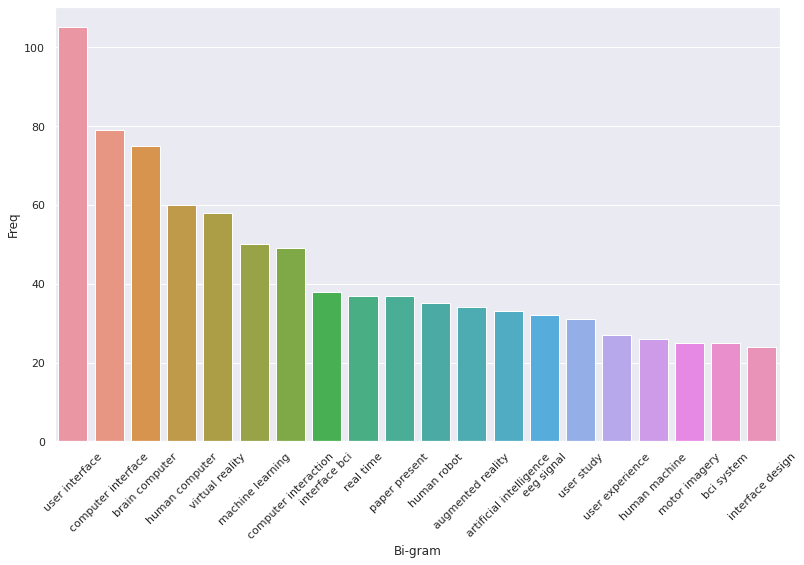

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0       brain computer interface    71
1     human computer interaction    48
2         computer interface bci    37
3        human robot interaction    23
4             virtual reality vr    20
5        human machine interface    16
6       graphical user interface    15
7       computer interaction hci    13
8     intelligent user interface    12
9     artificial intelligence ai    12
10          augmented reality ar    12
11    machine learning algorithm     9
12  convolutional neural network     9
13           play important role     8
14             user interface ui     8
15         robot interaction hri     8
16         user interface design     8
17      shape changing interface     8
18    human resource performance     8
19               ceramic tea set     8


[Text(0, 0, 'brain computer interface'),
 Text(0, 0, 'human computer interaction'),
 Text(0, 0, 'computer interface bci'),
 Text(0, 0, 'human robot interaction'),
 Text(0, 0, 'virtual reality vr'),
 Text(0, 0, 'human machine interface'),
 Text(0, 0, 'graphical user interface'),
 Text(0, 0, 'computer interaction hci'),
 Text(0, 0, 'intelligent user interface'),
 Text(0, 0, 'artificial intelligence ai'),
 Text(0, 0, 'augmented reality ar'),
 Text(0, 0, 'machine learning algorithm'),
 Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'play important role'),
 Text(0, 0, 'user interface ui'),
 Text(0, 0, 'robot interaction hri'),
 Text(0, 0, 'user interface design'),
 Text(0, 0, 'shape changing interface'),
 Text(0, 0, 'human resource performance'),
 Text(0, 0, 'ceramic tea set')]

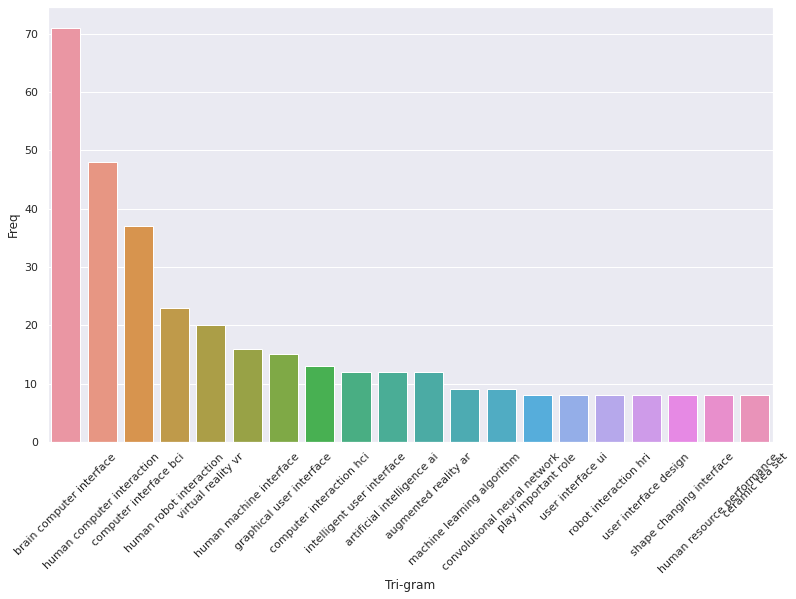

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

**Calculating the TF and IDF:**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[15]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Master_thesis_keywords.ipynb')

--2021-07-05 21:24:58--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-07-05 21:24:59 (24.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Master_thesis_keywords.ipynb to pdf
[NbConvertApp] Support files will be in Master_thesis_keywords_files/
[NbConvertApp] Making directory ./Master_thesis_keywords_files
[NbConvertApp] Making directory ./Master_thesis_keywords_files
[NbConvertApp] Making directory ./Master_thesis_keywords_files
[NbConvertApp] Making directory ./Master_thesis_keyw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'